## **NLTK - Natural language toolkit**

NLTK has been called “a wonderful tool for teaching, and working in, computational linguistics using Python,” and “an amazing library to play with natural language.”


### **Installation of NLTK**

In [ ]:
# pip is the package manager for Python. It is used to install, upgrade,
# and manage Python libraries and packages from the Python Package Index (PyPI)
# and other package repositories.

!pip install nltk


In [ ]:
import nltk

#Downloads the Punkt tokenizer models.
#This is used for tokenizing text into sentences or words.
nltk.download('punkt')

#Downloads a list of common stopwords in various languages (e.g., "is," "and," "the").
#These are often removed in text processing to focus on meaningful words.
nltk.download('stopwords')

#Downloads the WordNet lexical database.
#It provides understanding relationships between words as synonyms, antonyms, and hierarchies.
nltk.download('wordnet')

#Downloads the model for Part-of-Speech (POS) tagging,
#which assigns grammatical tags (e.g., noun, verb) to words in a sentence.
nltk.download('averaged_perceptron_tagger')

#Downloads the VADER (Valence Aware Dictionary and sEntiment Reasoner) lexicon,
#which is used for sentiment analysis, particularly for social media text.
nltk.download('vader_lexicon')

#Likely a typo or redundant (similar to 'punkt') or a specific tokenization resource.
nltk.download('punkt_tab')

#Appears to specify an English model for POS tagging.
#This isn't a standard resource name in NLTK and might be an extended or custom implementation.
nltk.download('averaged_perceptron_tagger_eng')

#the Maximum Entropy Named Entity Chunker model, used for named entity recognition (NER)
#to identify entities like names, locations, and organizations in text.
nltk.download('maxent_ne_chunker_tab')

#Downloads a corpus of English words, often used for
#checking spelling or identifying valid English words.
nltk.download('words')


In [ ]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize
from nltk.stem import WordNetLemmatizer
from nltk import ne_chunk

from nltk import pos_tag
from nltk.tokenize import word_tokenize
from nltk.tree import Tree

from nltk.sentiment import SentimentIntensityAnalyzer

### **1. Tokenization**

In [ ]:

text = "Natural Language Processing is exciting. Let's learn it with NLTK!"
print("Sentence Tokenization:", sent_tokenize(text))
print("Word Tokenization:", word_tokenize(text))


### **Task: Write a code to count the number of sentences and words in a given paragraph.**


Pedro Páramo is a novel by Mexican writer Juan Rulfo, first published in 1955. This novel showcases the roots of Mexican culture and its beliefs on afterlife through deeply complex characters, spirituality, and a constant transition between realms/dimensions that encompass a nonlinear chronology.


 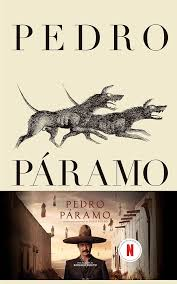


In [ ]:


text2 = "Vine a Comala porque me dijeron que acá vivía mi padre, un tal Pedro Páramo. \
Mi madre me lo dijo. Y yo le prometí que vendría a verlo en cuanto ella muriera.\
 Le apreté sus manos en señal de que lo haría, pues ella estaba por morirse y yo en un plan de prometerlo todo.\
  ""No dejes de ir a visitarlo -me recomendó. Se llama de este modo y de este otro. Estoy segura de que le dar gusto conocerte.\
  "" Entonces no pude hacer otra cosa sino decirle que así lo haría, \
  y de tanto decírselo se lo seguí diciendo aun después de que a mis manos les costó trabajo zafarse de sus manos muertas. "


t1=sent_tokenize(text2)
t2=word_tokenize(text2)

print("Sentence Tokenization:", t1)
print("number of sentences: ",len(t1))

print("Word Tokenization:", t2)
print("number of word: ",len(t2))

### **2. Lemmatization**

In [ ]:

lemmatizer = WordNetLemmatizer()
words = ["running", "runs", "ran", "easily", "fairly"]
lemmatized_words = [lemmatizer.lemmatize(w, pos="v") for w in words]
print("Lemmatized Words:", lemmatized_words)

### **Task: Do your own exercise lemmatiza all words in a given text.**

In [ ]:
lemmatizer = WordNetLemmatizer()
words = ["changing", "changed", "change"]
lemmatized_words = [lemmatizer.lemmatize(w, pos="v") for w in words]
print("Lemmatized Words:", lemmatized_words)

### **3. Named Entity Recognition**

In [ ]:
# Example 1

text = "Barack Obama was the 44th President of the United States."
tokens = nltk.word_tokenize(text)
pos_tags = nltk.pos_tag(tokens)
tree = ne_chunk(pos_tags)
print("Named Entities:", tree)

In [ ]:
# Example 2

text = "Barack Obama was the 44th President of the United States."
tokens = word_tokenize(text)
pos_tags = pos_tag(tokens)

#review of the entities
ne_tree = ne_chunk(pos_tags)

# review each elemented revied above
for subtree in ne_tree:

#if the declaration is an entity send it to print
    if isinstance(subtree, Tree):
        print("Named Entity:", " ".join(word for word, tag in subtree.leaves()))

### **Task: Write a function to extract and list all named entities from a paragraph.**

In [ ]:
#Exercuse for students. Replace the text.

text = "Don Quixote is a middle-aged gentleman from the region of La Mancha in central Spain. \
Obsessed with the chivalrous ideals touted in books he has read, \
he decides to take up his lance and sword to defend the helpless and destroy the wicked. \
After a first failed adventure, he sets out on a second one with a somewhat befuddled laborer named Sancho Panza,\
whom he has persuaded to accompany him as his faithful squire. In return for Sancho’s services, \
Don Quixote promises to make Sancho the wealthy governor of an isle. \
On his horse, Rocinante, a barn nag well past his prime, Don Quixote rides the roads of Spain in search of glory and grand adventure.\
He gives up food, shelter, and comfort, all in the name of a peasant woman, Dulcinea del Toboso, whom he envisions as a princess."

tokens = word_tokenize(text)
pos_tags = pos_tag(tokens)
ne_tree = ne_chunk(pos_tags)

for subtree in ne_tree:
    if isinstance(subtree, Tree):
        print("Named Entity:", " ".join(word for word, tag in subtree.leaves()))

### **4. Intent Detection Using NLTK**

In [ ]:
# Predefined intents and their associated keywords
intents = {
    "greeting": ["hello", "hi", "hey", "greetings", "morning", "evening"],
    "goodbye": ["bye", "goodbye", "see you", "take care", "farewell"],
    "order_food": ["order", "pizza", "burger", "food", "delivery", "menu"],
    "book_appointment": ["appointment", "book", "schedule", "meeting", "doctor"],
}

def detect_intent(user_input):
    """
    Detects the intent of a given user input based on predefined keywords.

    Args:
        user_input (str): Input text from the user.

    Returns:
        str: Detected intent or 'unknown' if no match is found.
    """
    #We split into words the data input by the user
    tokens = word_tokenize(user_input.lower())

    # retrieves a list of common English stop words.  include "the," "a," "is," "are," "and," "in," etc.
    stop_words = set(stopwords.words('english'))

    #This line cleans alfanumerical and stop words
    filtered_tokens = [word for word in tokens if word.isalnum() and word not in stop_words]

    #The magic happens. The comparisson of words and intents.
    for intent, keywords in intents.items():
        if any(keyword in filtered_tokens for keyword in keywords):
            return intent

    return "unknown"

# Example usage
user_inputs = [
    "Hello, can you help me?",
    #"I want to order a pizza.",
    #"Can I schedule a doctor's appointment?",
    #"Goodbye for now!",
    #"What's the weather today?"
]

for input_text in user_inputs:
    intent = detect_intent(input_text)

    print(f"User Input: '{input_text}' → Detected Intent: '{intent}'")

**Conclussion**

As we can see on the code above we did not use anything intelligent, smart or pre trained for determine something is an intention.

While we use other techniques for cleaning and analyzing the input information as words.

### **5. Frequency Distribution**



In [ ]:
text = "This is an example sentence to find word frequencies."
words = nltk.word_tokenize(text)
fdist = nltk.FreqDist(words)
print("Most common words:", fdist.most_common())

###**Task: Try here with your own text**

**Kahlil Gibran**, was a Lebanese-American writer, poet and visual artist; he was also considered a philosopher

Born: January 6, 1883

Died: April 10, 1931 (age 48 years)

In [ ]:
text = "Do not love half lovers - Kahlil Gibran\
Do not love half lovers\
Do not entertain half friends\
Do not indulge in works of the half talented\
Do not live half a life and do not die a half death"

words = nltk.word_tokenize(text)
fdist = nltk.FreqDist(words)
print("Most common words:", fdist.most_common())

### **6. Sentiment Analysis**

In [ ]:
sia = SentimentIntensityAnalyzer()
text = "NLTK is a wonderful library!"
sentiment = sia.polarity_scores(text)
print("Sentiment Scores:", sentiment)

**neg**: The negative sentiment score.

**neu**: The neutral sentiment score.

**pos**: The positive sentiment score.

**compound**: A normalized score that represents the overall sentiment.

 It ranges from -1 (very negative) to 1 (very positive). Scores around 0 typically indicate neutral sentiment.

In [ ]:
sia = SentimentIntensityAnalyzer()
text = "Insert here your phrase in english"
sentiment = sia.polarity_scores(text)
print("Sentiment Scores:", sentiment)

## **spaCy - Industrial-strength Natural Language Processing in Python**

### **Comparison: Named Entity Recognition (NER)**

In [ ]:
# Example text
text = "Barack Obama was the 44th President of the United States and was born in Hawaii."

# Tokenize and tag
tokens = word_tokenize(text)
pos_tags = pos_tag(tokens)

# Perform Named Entity Recognition
ne_tree = ne_chunk(pos_tags)

# Extract Named Entities
entities = []
for subtree in ne_tree:
    if hasattr(subtree, 'label'):
        entity_name = " ".join([leaf[0] for leaf in subtree.leaves()])
        entity_type = subtree.label()
        entities.append((entity_name, entity_type))

print("Entities using NLTK:", entities)

In [ ]:
import spacy

# Load spaCy's pre-trained model
nlp = spacy.load("en_core_web_sm")

# Example text
text = "Barack Obama was the 44th President of the United States and was born in Hawaii."

# Process text
doc = nlp(text)

# Extract Named Entities
entities = [(ent.text, ent.label_) for ent in doc.ents]
print("Entities using spaCy:", entities)